# GRIP - The Sparks Foundation

### Task-2: To explore Supervised Machine Learning Algorithm

In this project, I am going to build predictive model for accurately predicting  the marks obtained by a student based on the study hours.


### ---TABLE OF CONTENTS---

-Import packages

-Reading Data in pandas Dataframe

-Data Exploration- Regression plot

-Preparing data

-Linear Regression

-Evaluating the Model

### Objective:

-To understand what the correlation between number of hours studies and scores.

-To create a model that predicts the scores given the number of hours. 


## ---IMPORT PACKAGES---

In [65]:
#Import necessary libraries-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn as sk
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

__author__ = "Manasa Nallavelli"
__email__ = "manasa2093@gmail.com"

## --READING DATA--

In [4]:
#Reading data in Pandas Dataframe
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27


## ---DATA EXPLORATION---

Text(0, 0.5, 'Number of Scores')

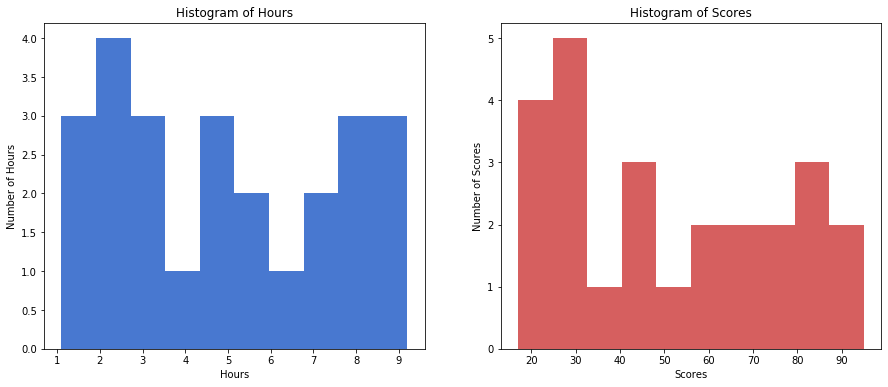

In [31]:
#Lets see the distribution of scores and hours individually 

d, axes = plt.subplots(ncols=2, figsize=(15, 6))
ax = df['Hours'].plot(kind='hist',ax=axes[0], color="b")
ax1 = df['Scores'].plot(kind='hist',ax=axes[1], color="r")

ax.set_title("Histogram of Hours")
ax.set_xlabel('Hours')
ax.set_ylabel('Number of Hours')

ax1.set_title("Histogram of Scores")
ax1.set_xlabel('Scores')
ax1.set_ylabel('Number of Scores')

Histogram of hours looks like bimodal distribution with 2 peaks - one between 1 to 3 and another between 7 to 9.

Histogram of Scores, it shows highest peak between 20 to 30 and somewhat lowest from 60 onwards. 

We will examine the correlation between these two varibles by plotting a scatter plot. 

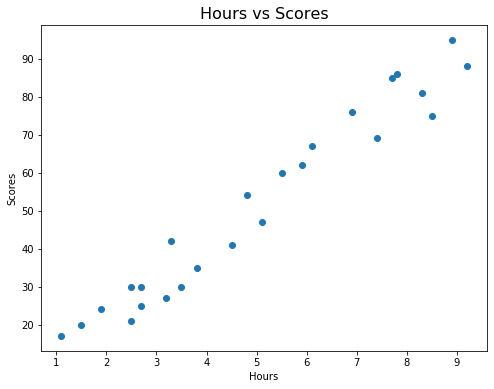

In [38]:
fig = plt.figure(figsize=(8,6))

plt.scatter(df.Hours,df.Scores)
plt.title("Hours vs Scores", fontsize=16)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

The above graph shows a Linear relationship between the Hours studies and Scores. With increase in number of hours there is a constant increase in Scores. 

We can further examine this by plotting a reg plot to confirm the existance of above relationship. 

Text(0, 0.5, 'Scores')

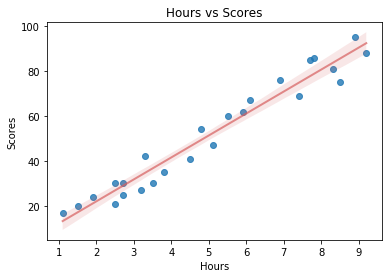

In [41]:
sns.regplot(x=df.Hours, y=df.Scores, line_kws={"color":"r","alpha":0.7,"lw":2})
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')

We can confirm that there is strong positive corelation between the relationship between Hours and Scores. 

Now, lets prepare the data and train "Linear Regression" model.


## ---PREPARING DATA---

In [50]:
x = df.iloc[:, :-1]
y = df.iloc[:, 1] 

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=0)

We split the data in 80-20% for training and testing. 

Next, we will fit "Linear Regression" model.

## ---LINEAR REGRESSION---

In [55]:
#Intializing the model
lr = LinearRegression()

#Fitting the model
lr = lr.fit(x_train,y_train)

#making predictions
y_predict = lr.predict(x_test)

In [56]:
#creating new dataframe with actual and predicted results 
results = pd.DataFrame({'Actual':y_test,'Predicted':y_predict})

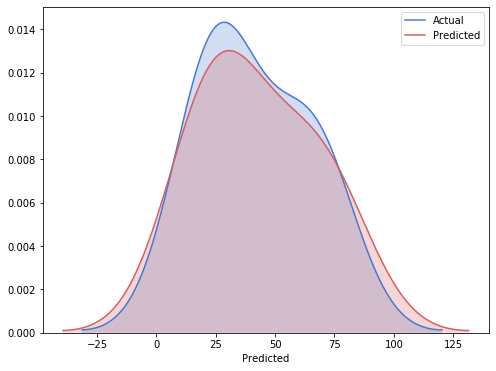

In [63]:
#We will check how accurately the the linear Regression model predicted the results by plotting a dist plot 
fig = plt.figure(figsize=(8,6))
ax1 = sns.distplot(results.Actual,hist=False,color='b',label='Actual',kde_kws={"shade": True})
sns.distplot(results.Predicted,hist=False,color='r',label='Predicted',ax=ax1,kde_kws={"shade": True})

#We can observe that the Linear model acurately predicted the results expect for 5-10% of data. Let us evalute this model and check if our assumptions are true. 

## --EVALUATING MODEL--

In [68]:
# Store r^2 and mse in variables
r2 = format(r2_score(y_test, y_predict),'.3f')
mse = format(mean_absolute_error(y_test, y_predict),'.3f')

In [69]:
print("R Squared Score: ", r2)
print("Mean Absolute Error: ", mse)

R Squared Score:  0.945
Mean Absolute Error:  4.184


Wow the r^2 is 94% - meaning 94% of variation in Scores is expplained by number of hours.

Hence, we can assume Linear Regression is best fit for our data.  